In [1]:
from __future__ import division

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import time
import sys
sys.path.insert(0, '..')

import random
import numpy as np
import pandas as pd
from collections import deque
from scipy.integrate import odeint
from control import lqr

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical
from torch.utils.tensorboard import SummaryWriter

from algs.td3 import Agent_TD3
from algs.ppo import Agent_PPO
from envs.env import WoundEnv, SimpleEnv
from cfgs.config import GetParameters

In [2]:
args = GetParameters()
env = WoundEnv(args)

In [3]:
state = env.reset()

state_buf = np.zeros((0, 500))

for t in range(env.t_nums - 1):
    action = 0
    state_next, reward, done, info = env.step(action)
    state_buf = np.vstack((state_buf, state))
    state = state_next
state_buf = np.vstack((state_buf, state))
state_buf_plot = state_buf.reshape(-1, 5, 100)

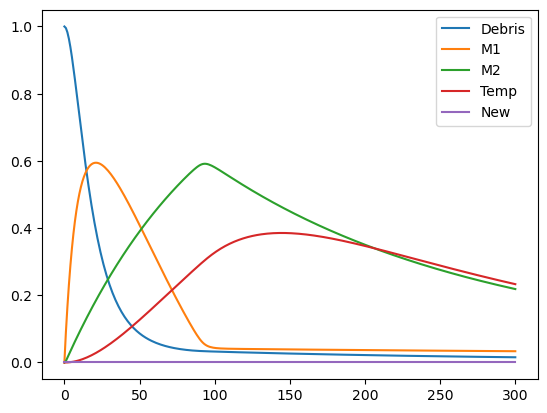

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(state_buf_plot[:, 0, 0], label='Debris')
ax.plot(state_buf_plot[:, 1, 0], label='M1')
ax.plot(state_buf_plot[:, 2, 0], label='M2')
ax.plot(state_buf_plot[:, 3, 0] / 6.0, label='Temp')
ax.plot(state_buf_plot[:, 4, 0], label='New')
ax.legend()

In [ ]:
aa.shape